In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as seaborn
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords

In [5]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Semester 6/Natural Language Processing/Assignment 1/spam.csv', encoding = 'latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df = data.iloc[:,:2]
df.rename(columns = {'v1' : 'target', 'v2' : 'text'}, inplace = True)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


(array([4825.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         747.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

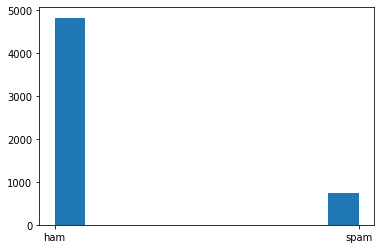

In [13]:
plt.hist(df['target'])

## WordCloud

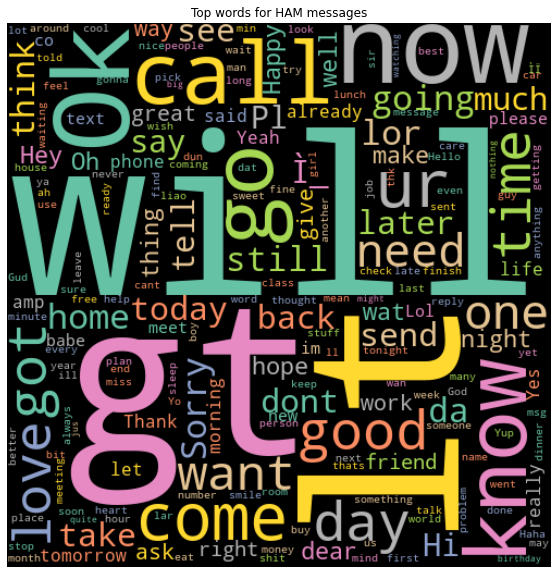

In [17]:
from wordcloud import WordCloud, STOPWORDS
stop_words = list(STOPWORDS)
wc_ham = WordCloud(width = 500, height = 500, random_state=1, background_color='black', colormap='Set2', 
               collocations=False, stopwords = stop_words).generate(' '.join(text for text in df.loc[df['target'] == 'ham', 'text']))
plt.figure(figsize=(10,10))
plt.title('Top words for HAM messages')
plt.imshow(wc_ham, interpolation='bilinear')
plt.axis("off")
plt.show()

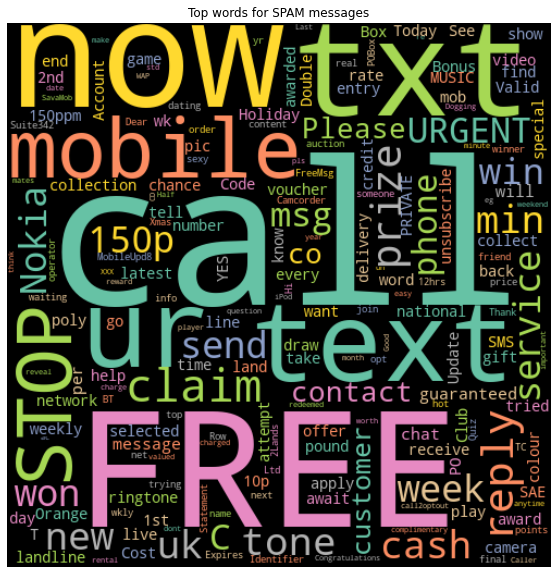

In [19]:
wc_spam = WordCloud(width = 500, height = 500, random_state=1, background_color='black', colormap='Set2', 
               collocations=False, stopwords = stop_words).generate(' '.join(text for text in df.loc[df['target'] == 'spam', 'text']))
plt.figure(figsize=(10,10))
plt.title('Top words for SPAM messages')
plt.imshow(wc_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

### Preprocessing

In [20]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
to_remove = list(stopwords.words('english'))+list(punctuation)
final_corpus = []
stemmer = LancasterStemmer()

for i in range(len(df)):
  word = word_tokenize(df['text'][i].lower())
  word = [stemmer.stem(y) for y in word if y not in to_remove]
  j = " ".join(word)
  final_corpus.append(j)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(final_corpus)
print(type(vector))
X = vector.toarray()
y=df['target']

<class 'scipy.sparse.csr.csr_matrix'>


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Models

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [28]:
models=[]
models.append(('Random Forest',RandomForestClassifier()))
models.append(('decision tree',DecisionTreeClassifier()))
models.append(('logistic regression',LogisticRegression()))
models.append(('naive bayes',GaussianNB()))
models.append(('svm',SVC(gamma='auto')))

In [30]:
from pandas.core.dtypes.cast import maybe_unbox_datetimelike_tz_deprecation
from sklearn.metrics import accuracy_score
for name, model in models:
  print("Model : ", name)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  print("Accuracy Score : ", accuracy_score(y_test, pred))
  print("______________________________________________________")

Model :  Random Forest
Accuracy Score :  0.9782490483958673
______________________________________________________
Model :  decision tree
Accuracy Score :  0.9608482871125612
______________________________________________________
Model :  logistic regression
Accuracy Score :  0.9429037520391517
______________________________________________________
Model :  naive bayes
Accuracy Score :  0.8613376835236541
______________________________________________________
Model :  svm
Accuracy Score :  0.8629690048939641
______________________________________________________
